## Boston Housing Price Prediction

In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('boston.csv')
dataset.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [3]:
dataset.columns

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

In [4]:
features = ['TOWN', 'TRACT', 'LON', 'LAT', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
target = ['MEDV']

#### always a good practice to check for the description about the dataset. get familiar with the columns and everything about the dataset.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


In [6]:
## Stats summarizing
dataset.describe()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [7]:
## check for missing values

dataset.isnull().sum()

TOWN       0
TRACT      0
LON        0
LAT        0
MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
dtype: int64

## Exploratory Data Analysis

we do EDA to understand our dataset better.

In [8]:
## always check the correlation whenever we are doing any type of regression

dataset.corr()

C:\Users\iamya\AppData\Local\Temp\ipykernel_25340\3557887649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
TRACT,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678
LON,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602
LAT,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527
MEDV,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655
CRIM,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,-0.569807,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501


Here we need to check for 2 types of correlation.
1. correlation between independent features 
2. correlation between dependent and independent features


If there is high correlation(any positive or negative) between independent features; we can remove one of the feature.

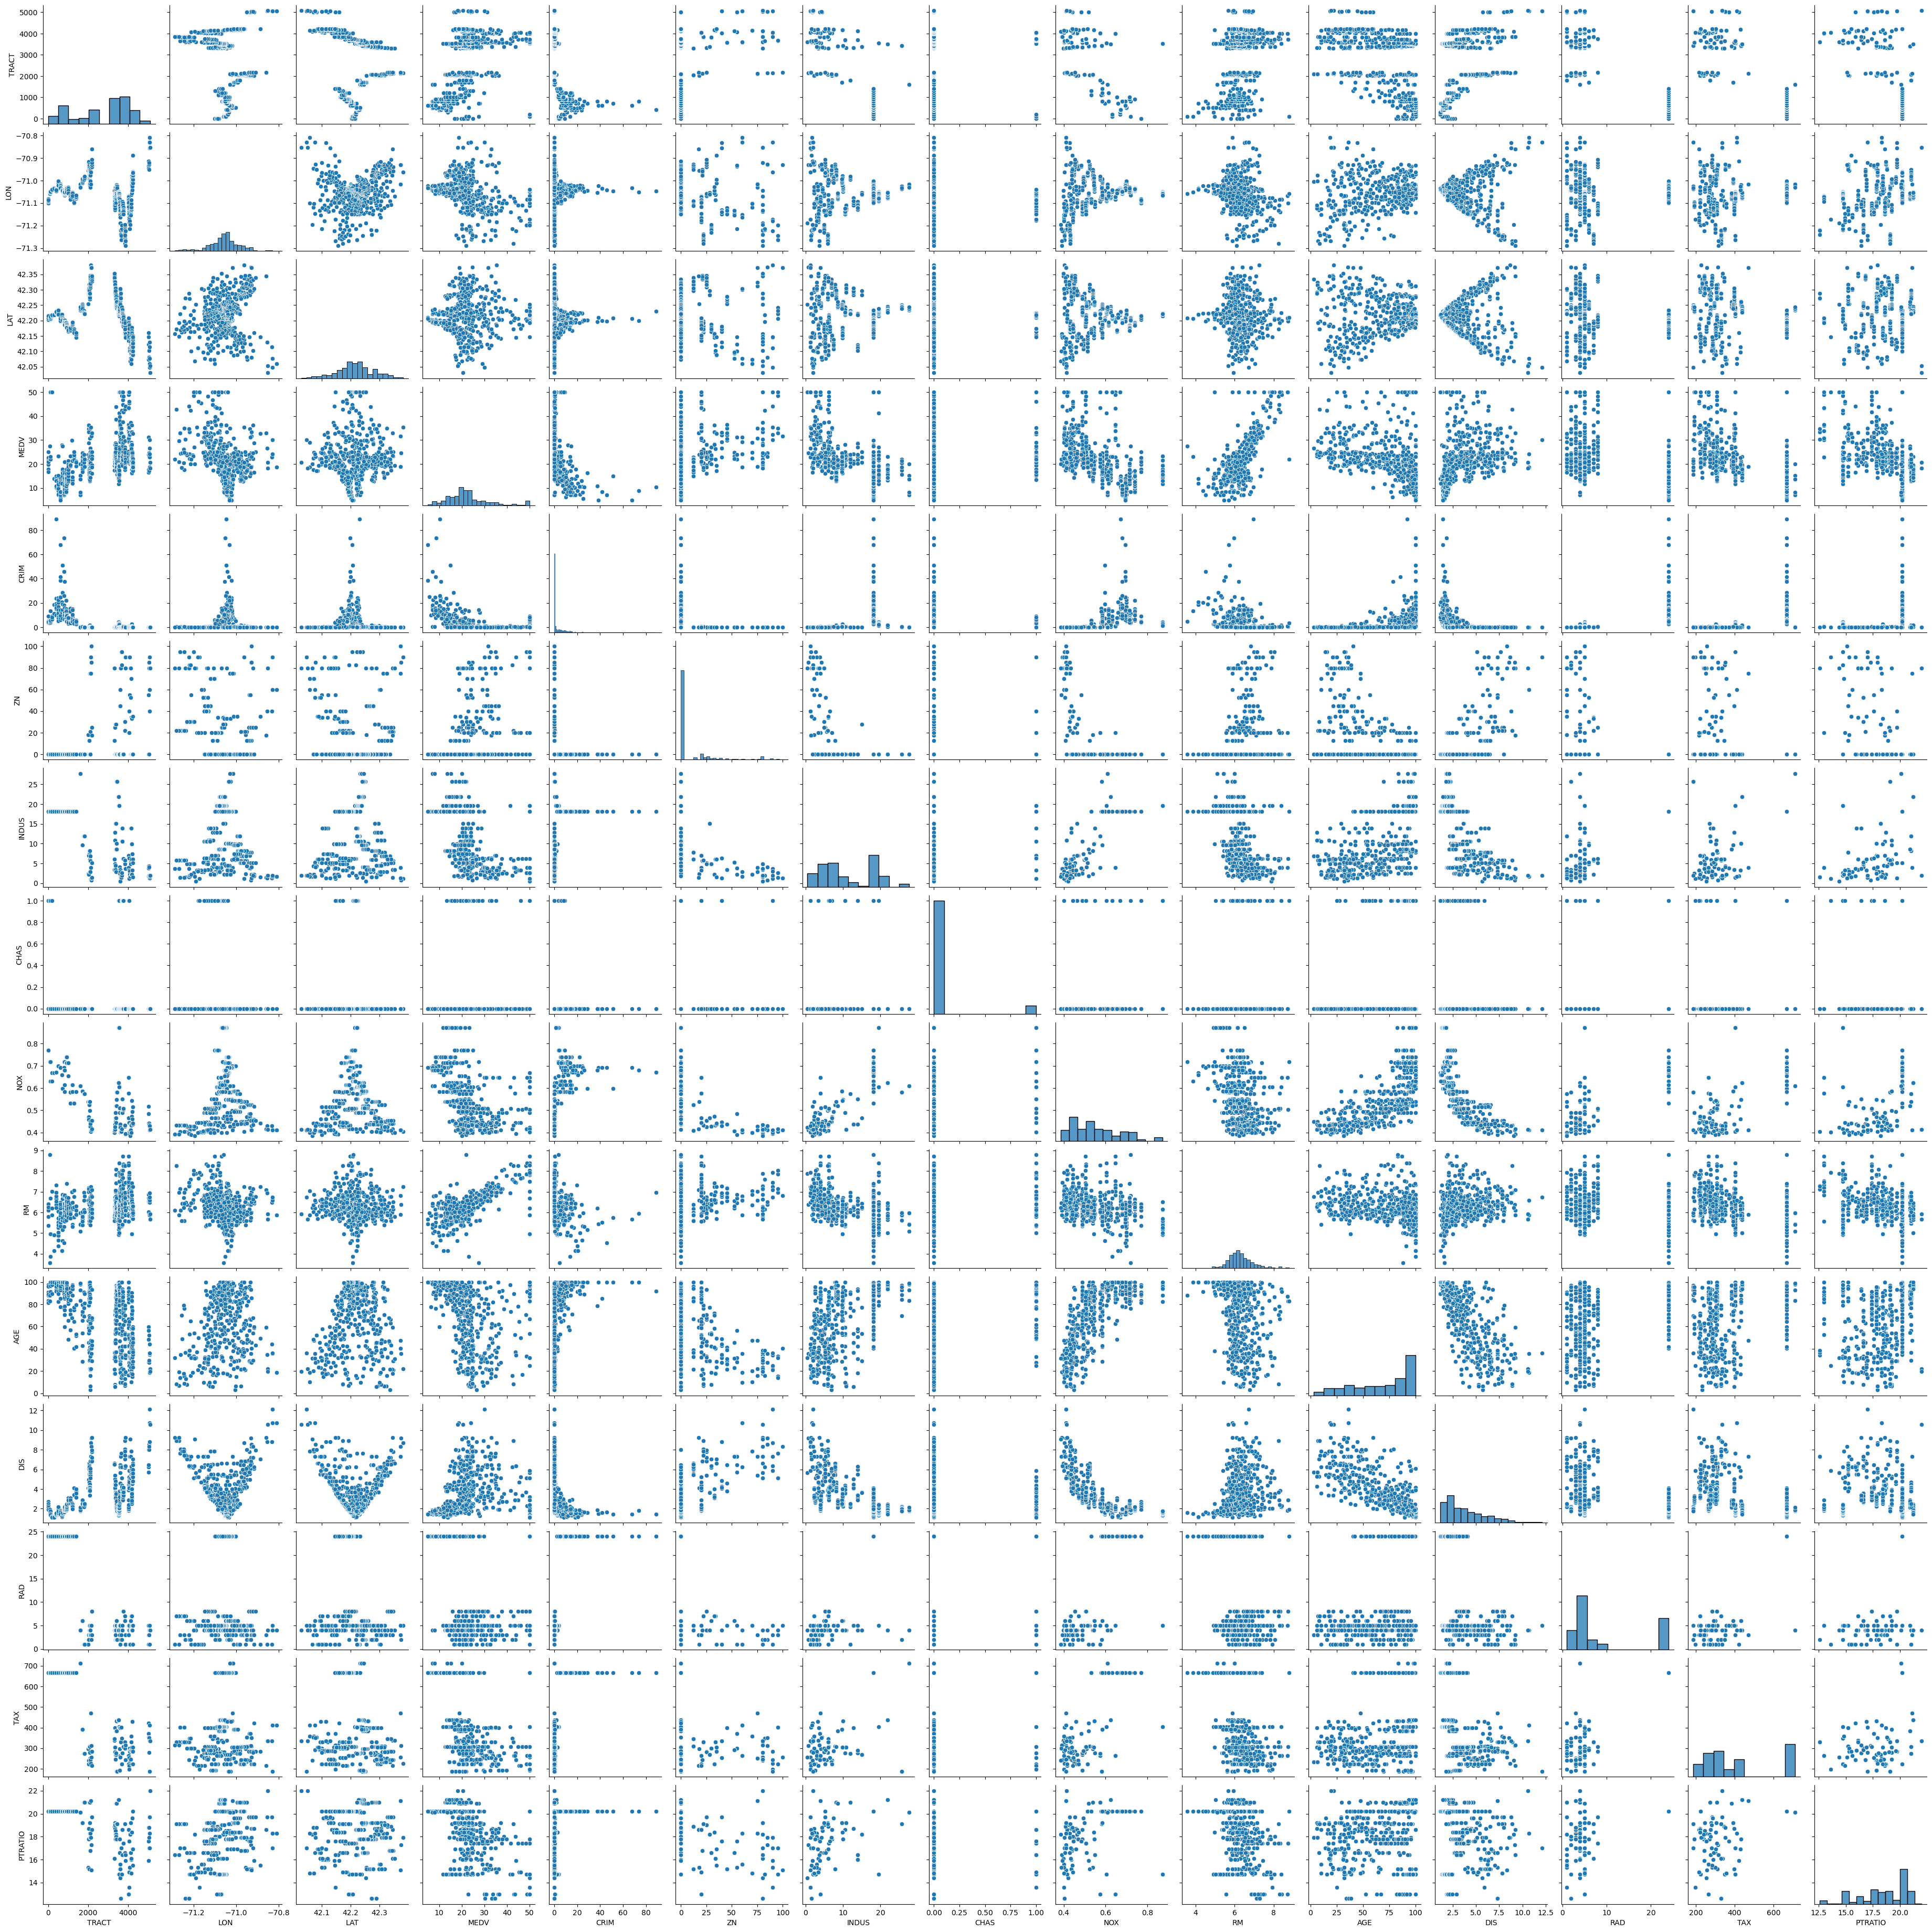

In [9]:
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

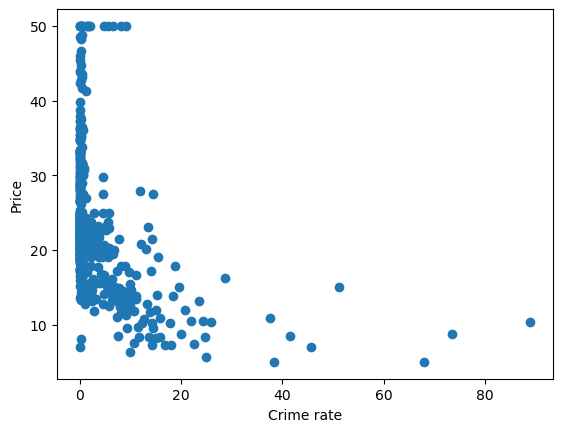

In [10]:
## Relationship between crime and median value of a home(target)
plt.scatter(dataset['CRIM'], dataset['MEDV'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

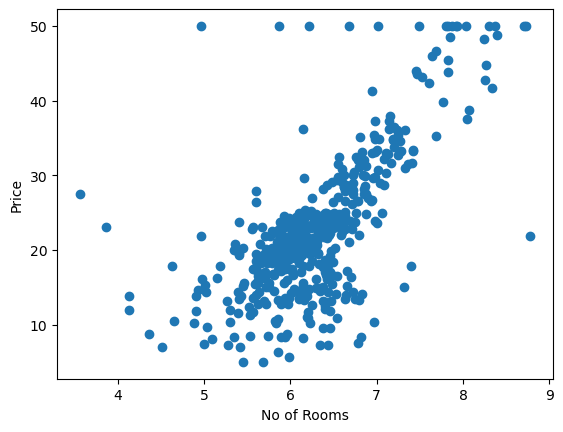

In [11]:
plt.scatter(dataset['RM'], dataset['MEDV'])
plt.xlabel('No of Rooms')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='MEDV'>

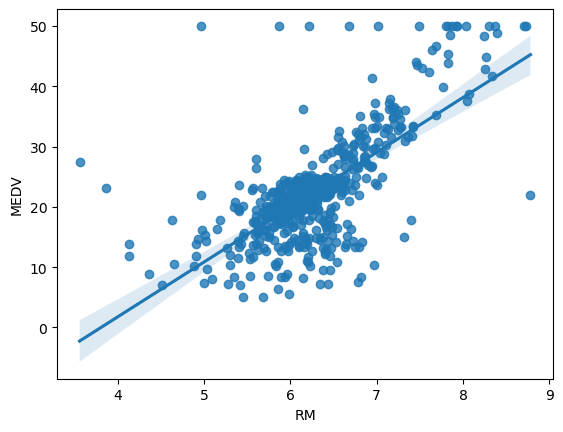

In [12]:
## based on just one feature RM we can draw regression line with seaborn
sns.regplot(x= 'RM',y = 'MEDV', data=dataset)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

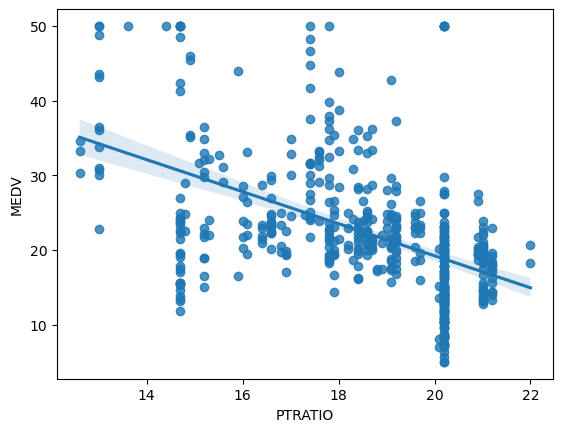

In [13]:
sns.regplot(x= 'PTRATIO',y = 'MEDV', data=dataset)

In [14]:
## Independent and Dependent features

y = dataset['MEDV']
dataset.drop(['MEDV'],inplace = True, axis = 1)
X = dataset

In [15]:
X.head()

,TOWN,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [16]:
X.drop(['TOWN'],inplace = True, axis = 1)

In [17]:
X.head()

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,2011,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,2021,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,2022,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,2031,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,2032,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [19]:
## train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [20]:
X_train

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
5,2033,-70.9165,42.3040,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7
116,3416,-71.0360,42.2608,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8
45,2105,-70.9725,42.3075,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9
16,2054,-70.9870,42.2985,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0
468,1102,-71.0700,42.1680,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3397,-71.0622,42.2431,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9
270,4022,-71.0870,42.1410,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6
348,5041,-70.9200,42.1016,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0
435,903,-71.0460,42.1867,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2


In [21]:
X_test

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
173,3562,-71.0855,42.2450,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6
274,4031,-71.1305,42.1675,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6
491,1605,-71.0160,42.2382,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1
72,3323,-71.1300,42.3050,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2
452,921,-71.0340,42.1790,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,910,-71.0345,42.1850,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2
23,2061,-70.9730,42.2790,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0
225,3736,-71.1012,42.1975,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4
433,901,-71.0495,42.1815,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2


## Feature Scaling

why it is necessary?

When we have different independent features in the dataset; each feature has its very own unit and magnitude; for example age in years and height in cm. here age might be less compare to height and so does its magnitude towards the target variable. To overcome this issue we scale the data.


## Normalization

normalization helps us to scale down features between 0 to 1.
Xn = (X - Xmin) / (Xmax - Xmin)

### It is also known as MinMax Scaler

## Standardization

it will help us to scale down the feature based on standard normal distribution; mean = 0 std = 1.
z = (X- μ) / σ

## What to use ?



In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.5082545 ,  1.86743221,  1.48953681, ..., -0.74617905,
        -1.11279004,  0.18727079],
       [ 0.48696306,  0.30034457,  0.76849159, ..., -0.39846419,
         0.15008778, -0.21208981],
       [-0.45644274,  1.13306478,  1.54795482, ..., -0.74617905,
        -1.0466393 , -0.16771641],
       ...,
       [ 1.6563257 ,  1.82153425, -1.88869357, ..., -0.6302741 ,
        -0.76399522, -0.56707702],
       [-1.32141129,  0.16920753, -0.46830125, ...,  1.68782492,
         1.5572945 ,  0.8528718 ],
       [ 0.47041208, -0.29239485,  0.61326657, ..., -0.51436915,
        -0.13857001,  1.16348561]])

In [26]:
X_test

array([[ 0.59202579, -0.34878378,  0.50477597, ..., -0.51436915,
        -0.66777595, -0.74457062],
       [ 0.92952184, -0.93890047, -0.7887658 , ..., -0.6302741 ,
        -0.92035152, -0.30083661],
       [-0.81624663,  0.56261866,  0.39127812, ..., -0.6302741 ,
         1.82791117,  0.8084984 ],
       ...,
       [ 0.71723754, -0.55466894, -0.28803995, ..., -0.16665429,
        -0.60162521, -0.38958342],
       [-1.32285051,  0.12330957, -0.55509373, ...,  1.68782492,
         1.5572945 ,  0.8528718 ],
       [-1.31205639,  0.28723087, -0.51336658, ...,  1.68782492,
         1.5572945 ,  0.8528718 ]])

## Training the model

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
## print the coefficients and intercept
lr.coef_

array([-0.84960537, -0.07628107, -0.06742482, -1.52987773,  0.63218251,
        0.07961869,  1.19711355, -2.59820906,  4.65241774, -1.45601248,
       -3.195273  ,  0.94946733, -1.63416606, -2.25642193])

In [30]:
print(lr.intercept_)

23.023163841807914


In [31]:
## on which parameters the model has been train

lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
## prediction with test data

reg_predict = lr.predict(X_test)

In [33]:
reg_predict

array([27.19689793, 36.24973314, 16.29437798, 24.5296337 , 17.64460665,
       23.42096659, 18.8680901 , 18.2237044 , 20.33419088, 21.12235189,
       27.45941607, 20.50804819, -0.22189174, 22.75967157, 17.10306472,
       25.24617386, 20.98720514,  7.97751032, 41.61573773, 15.9399857 ,
       26.8970354 , 29.80737838, 15.09253979, 24.45183157, 15.92377014,
       13.89855927, 22.0952288 , 19.32069485, 25.17272938, 19.48222869,
       21.57038931, 23.24361084, 24.01866272, 11.31754219, 18.25876474,
       16.03689229, 30.60591892, 18.38817962, 27.05097944, 25.76789064,
       16.88528964, 30.49789897, 44.04913651, 18.35713021, 26.70918325,
       14.36772568, 15.6485185 , 26.85357527, 19.25246811, 28.59403766,
       21.27083877, 33.75201803, 18.38017394, 24.6743293 , 38.06656777,
       20.34294479, 16.54129279, 31.42579706, 25.46099352, 14.54804806,
       23.43807479, 31.63001915, 29.79753002, 17.20449589, 18.59126478,
       20.71659938, 19.30649789, 25.29818407, 30.68036033, 15.50

## Assumptions 

Text(0, 0.5, 'Actual Value')

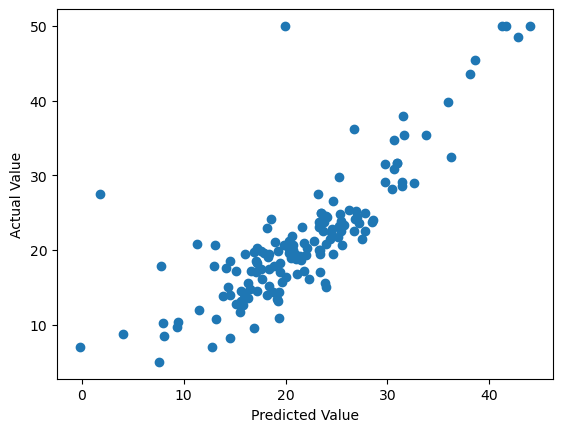

In [34]:
## plot a scatter plot for the prediction

plt.scatter(reg_predict, y_test)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [35]:
## error

residuals = y_test - reg_predict

In [36]:
residuals

173   -3.596898
274   -3.849733
491   -2.694378
72    -1.729634
452   -1.544607
         ...   
441    0.032483
23    -1.173289
225    8.698951
433   -4.463930
447   -3.258026
Name: MEDV, Length: 152, dtype: float64

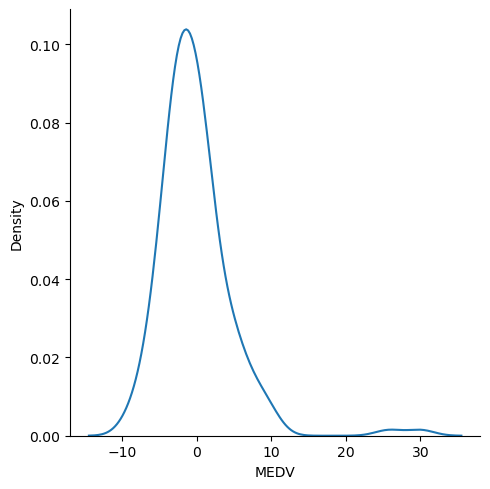

In [37]:
## plot the residuals

sns.displot(residuals, kind = 'kde')

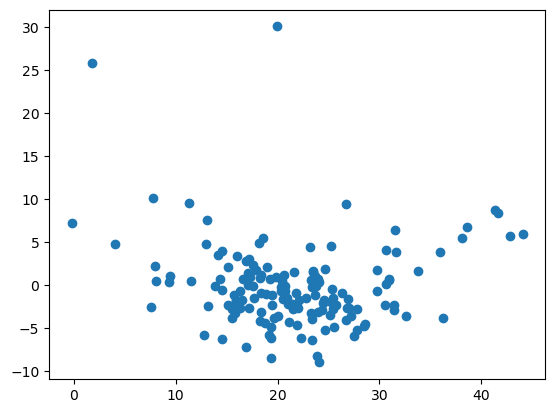

In [38]:
## scatter plot with respect to prediction and residuals

plt.scatter(reg_predict, residuals)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test, reg_predict))
print(mean_squared_error(y_test, reg_predict))

3.3221250563368834
24.456141130218644


In [41]:
print('Root mean squared error: ', (np.sqrt(mean_squared_error(y_test, reg_predict))))

Root mean squared error:  4.945315068852403


## R square and Adj. R square

R^2 = 1 - SSR/SST

R^2 = coefficient of determinationp;

SSR = sum of squared residuals;

SST = total sum of squared

In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_predict)
score

0.6733503193810115

R2 close to 1 means it is better for us.

## Adj. R square

Adj. R^2 = 1 - [(1-R2)*(n-1)/(n-k-1)].

R2 : The R2 of the model;

n = total number of observations;

k = total number of predictor variable(s)

In [49]:
adj_r2  = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r2

0.6399700600476842

## New Data Prediction

In [56]:
X_test[0].shape

(14,)

In [61]:
X_test[0].reshape(1,-1)

array([[ 0.59202579, -0.34878378,  0.50477597, -0.406801  , -0.50512499,
        -1.02225586, -0.28154625, -0.40521827,  0.12577051,  0.55383118,
        -0.52734802, -0.51436915, -0.66777595, -0.74457062]])

In [62]:
X_test[0].shape

(14,)

In [59]:
lr.predict(X_test[0].reshape(1,-1))

array([27.19689793])

In [60]:
reg_predict[0]

27.196897929292085

## Pickling the model file for Deployment

In [63]:
import pickle

In [64]:
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [65]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [68]:
## prediction

pickled_model.predict(X_test[0].reshape(1,-1))

array([27.19689793])